## Evaluation Metrics for Classification

Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

Load the necesary modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

* Load the Dataset
* Replace the _ from string values
* Identify the categorical columns
* Convert the totalcharges to numerical

In [2]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

* Split the data for train and test
* drop the target column in train and test set

In [3]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

* Classified the data set

In [4]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

* Create DictVectorizer
* Train the converted dict values
* Fit the model into LogisticRegression

In [5]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Predict the value from generated model

In [6]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

# Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines


# What is accuracy?
Accuracy tells the how many correct predictions were made

Accuracy can be calculated using below formula

$Accuracy = \cfrac{TP + TN }{TP + TN + FP + FN}$

In [7]:
len(y_val)

1409

In [8]:
(y_val == churn_decision).sum()

1132

# What are thresholds?
Recall that in our model, we made it such that if y_pred >= 0.5, it would be counted as 1. However, that probability can be adjusted such that we can make stricter predictions or more lenient predictions.

For example, instead of 0.5, we can make it such that anything from 0.3 onwards would be counted as 1, or anything from 0.74 would be counted as 1.

In [9]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    scores.append(score)

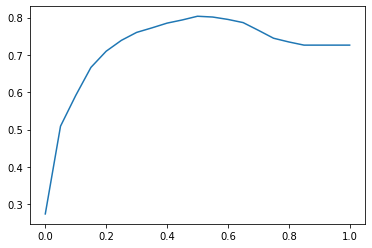

In [12]:
plt.plot(thresholds, scores)